## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/Greatlearning_AIML/Greatlakes/Residency_Labs_Solution/Project/Deep Learning/DogBreed_Classification/"
!ls "/content/drive/My Drive/Greatlearning_AIML/Greatlakes/Residency_Labs_Solution/Project/Deep Learning/DogBreed_Classification"

labels.csv.zip	sample_submission.csv.zip  test.zip  train.zip


Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
labels = pd.read_csv("labels.csv")

In [0]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [0]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
id       10222 non-null object
breed    10222 non-null object
dtypes: object(2)
memory usage: 159.8+ KB


### Print the count of each category of Dogs given in the dataset



In [0]:
labels["breed"].value_counts()

scottish_deerhound                126
maltese_dog                       117
afghan_hound                      116
entlebucher                       115
bernese_mountain_dog              114
shih-tzu                          112
pomeranian                        111
great_pyrenees                    111
basenji                           110
samoyed                           109
airedale                          107
tibetan_terrier                   107
cairn                             106
leonberg                          106
beagle                            105
japanese_spaniel                  105
australian_terrier                102
blenheim_spaniel                  102
miniature_pinscher                102
irish_wolfhound                   101
saluki                             99
lakeland_terrier                   99
papillon                           96
norwegian_elkhound                 95
whippet                            95
siberian_husky                     95
pug         

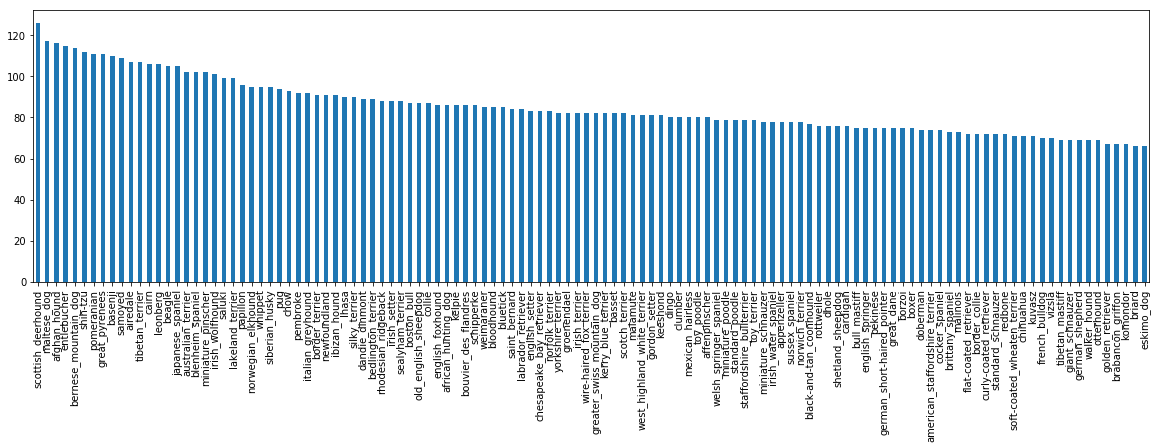

In [0]:
labels['breed'].value_counts().plot.bar(figsize=(20,5))

### Get one-hot encodings of labels

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le = LabelEncoder()
le.fit(labels['breed'])

LabelEncoder()

In [0]:
y = tf.keras.utils.to_categorical(le.transform(labels['breed']),
                                        num_classes=int(120))

In [0]:
y.shape

(10222, 120)

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
img_rows=128
img_cols=128
num_channel=3

In [0]:
from tqdm import tqdm
import cv2
x_feature = []
y_feature = []

i = 0 # initialisation
for f,img in tqdm(labels.values):
  train_img = cv2.imread('./train/{}.jpg'.format(f),1)
  train_img_resize = cv2.resize(train_img,(img_rows,img_cols))
  x_feature.append(train_img_resize)
  label = y[i]
  y_feature.append(label)
  i=i+1

100%|██████████| 10222/10222 [00:25<00:00, 403.23it/s]


In [0]:
x_train_data = np.array(x_feature, np.float32) / 255.   # /= 255 for normolisation
print (x_train_data.shape)
# x_train_data = np.expand_dims(x_train_data, axis = 3) # for keras to given input to Conv2D layer
# print (x_train_data.shape)

(10222, 128, 128, 3)


In [0]:
y_train_data = np.array(y_feature)
y_train_data.shape

(10222, 120)

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(x_train_data,
                                             y_train_data,
                                             test_size=0.2,
                                            random_state=7)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(8177, 128, 128, 3)
(2045, 128, 128, 3)
(8177, 120)
(2045, 120)


### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
test_img = pd.read_csv("sample_submission.csv")

In [0]:
test_img.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333

In [0]:
test_img=test_img["id"]

In [0]:
test_img.head()

0    000621fb3cbb32d8935728e48679680e
1    00102ee9d8eb90812350685311fe5890
2    0012a730dfa437f5f3613fb75efcd4ce
3    001510bc8570bbeee98c8d80c8a95ec1
4    001a5f3114548acdefa3d4da05474c2e
Name: id, dtype: object

Run the below code to load the test image files in x_test_feature

In [0]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 0)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:13<00:00, 784.33it/s]


Normalize the test data and convert it into 4 dimensions

In [0]:
#test_data = np.array(x_test_feature, np.float32) / 255   # /= 255 for normolisation
#x_test_feature = x_test_feature.astype('float32')


test_data = np.array(x_test_feature)
test_data = test_data.astype('float32')
test_data /= 255


In [0]:
test_data.shape

(10357, 128, 128)

In [0]:
test_data = np.expand_dims(test_data, axis = 3)
print (test_data.shape)

(10357, 128, 128, 1)


### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
from keras import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D, MaxPooling2D, Dropout

In [0]:
cnn = Sequential()
cnn.add(Conv2D(32, (5, 5), activation='relu', input_shape=(128, 128, 3)))
cnn.add(Conv2D(32, (3, 3), activation='relu'))

cnn.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
cnn.add(Dense(256, activation='relu'))
cnn.add(Dense(120, activation='softmax'))

In [0]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 122, 122, 32)      9248      
_________________________________________________________________
flatten_4 (Flatten)          (None, 476288)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               121929984 
_________________________________________________________________
dense_8 (Dense)              (None, 120)               30840     
Total params: 121,972,504
Trainable params: 121,972,504
Non-trainable params: 0
_________________________________________________________________


In [0]:
cnn.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
cnn.fit(X_train,y_train,          
          validation_data=(X_val,y_val),
          epochs=10,
          batch_size=128)

W0804 15:55:55.549915 140189944739712 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0804 15:55:55.611214 140189944739712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 26s 3ms/step - loss: 5.8880 - acc: 0.0127 - val_loss: 4.7455 - val_acc: 0.0156
Epoch 2/10
8177/8177 [==============================] - 14s 2ms/step - loss: 4.2879 - acc: 0.0893 - val_loss: 4.7659 - val_acc: 0.0313
Epoch 3/10
8177/8177 [==============================] - 14s 2ms/step - loss: 1.9325 - acc: 0.5840 - val_loss: 5.8466 - val_acc: 0.0342
Epoch 4/10
8177/8177 [==============================] - 14s 2ms/step - loss: 0.2108 - acc: 0.9623 - val_loss: 9.0217 - val_acc: 0.0313
Epoch 5/10
8177/8177 [==============================] - 14s 2ms/step - loss: 0.0322 - acc: 0.9958 - val_loss: 8.1547 - val_acc: 0.0303
Epoch 6/10
8177/8177 [==============================] - 14s 2ms/step - loss: 0.0233 - acc: 0.9974 - val_loss: 8.3688 - val_acc: 0.0372
Epoch 7/10
8177/8177 [==============================] - 14s 2ms/step - loss: 0.0102 - acc: 0.9993 - val_loss: 9.1560 - val_acc: 0.0352
Epoch 8

In [0]:
prediction = cnn.predict(test_data)

ValueError: ignored

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from keras.preprocessing.image import ImageDataGenerator , load_img ,img_to_array

In [0]:
# this will do preprocessing and realtime data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    rotation_range=25,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator = datagen.flow(X_train, y_train, batch_size=32)
val_generator = datagen.flow(X_val, y_val, batch_size=32)

In [0]:
tf.keras.backend.clear_session()

from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout

#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(5,5), #Size of the filter
                                 activation='relu'
                                , input_shape=(128,128,3)))



#Add second  convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'
                                , input_shape=(128,128,3)))

model.add(tf.keras.layers.Dropout(0.25))

#Flatten the output
model.add(tf.keras.layers.Flatten())

#Dense layer
model.add(tf.keras.layers.Dense(256, activation='relu'))

#Dense layer
model.add(tf.keras.layers.Dense(120, activation='softmax'))


model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [0]:
# Set up the generator
#Train the model
history = model.fit_generator(train_generator, 
                             validation_data=val_generator , use_multiprocessing=True,
                     steps_per_epoch=len(X_train) / 32, epochs=10)

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(project_path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

Print the summary of the base_model

In [0]:
base_model.summary()

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout 
from keras.layers.normalization import BatchNormalization


model_transfer = Sequential()
model_transfer.add(Dense(1024,input_dim=512, activation='relu'))
model_transfer.add(BatchNormalization())
model_transfer.add(Dropout(0.80))
model_transfer.add(Dense(256, activation='relu'))
model_transfer.add(BatchNormalization())
model_transfer.add(Dropout(0.20))
model_transfer.add(Dense(256, activation='relu'))
model_transfer.add(BatchNormalization())
model_transfer.add(Dropout(0.40))

model_transfer.add(Dense(120,activation='softmax'))
model_transfer.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in base_model.layers:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in base_model.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
x_train_5 = base_model.predict(X_train)

X_valid_5 = base_model.predict(X_validation)

In [0]:
output_transfer = model_transfer.fit(x_train_5, Y_train, 
                                      validation_data=(X_valid_5, Y_validation),
                                      batch_size=128, epochs=100, verbose=1)